## News Mood
This project analyzes the last five hundred tweets of five major news oulets: BBC World, CBS, CNN, Fox News, and The New York Times. It uses the [Vader Sentiment Analyzer](https://github.com/cjhutto/vaderSentiment), [Tweepy](https://github.com/tweepy/tweepy), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/).

The project contains two helper functions which are defined in "process_tweets.py". Vader analysis is declared and initialized in that file.

In [1]:
import config as cfg
import process_tweets as pt

import datetime
import os
import json

import tweepy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch

%matplotlib inline

### Initialize Tweepy

In [2]:
auth = tweepy.OAuthHandler(cfg.API_KEY, cfg.API_SECRET)
auth.set_access_token(cfg.ACCESS_TOKEN, cfg.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

### Initialize the DataFrame
This creates the structure of the data frame and then sets the order of the columns.

In [3]:
tweet_df = pd.DataFrame({
    'Source': '',
    'Text': '',
    'Date': '',
    'Sent.Compound': '',
    'Sent.Positive': '',
    'Sent.Neutral': '',
    'Sent.Negative': ''
}, index=[0])

tweet_df = tweet_df[['Source', 'Text', 'Date', 'Sent.Compound', 'Sent.Positive', 'Sent.Neutral', 'Sent.Negative']]

### Get All the Tweets
This cell loops through the users and then calls retrieve_tweets from the "process_tweets.py" file. All writing to the data frame is handled inside that file.

In [4]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

for user in users:
    write_rows = [0, 100, 200, 300, 400]
    user_name = '@' + user
    pt.retrieve_tweets(api, user_name, user, tweet_df, write_rows[users.index(user)])

### Write the Data Frame to a CSV

In [5]:
tweet_df.to_csv(os.path.join('csv', 'twitter_moods.csv'))

### Scatter Plot of the Last Five Hundred Tweets
The sentiment analyzer rates the tweets from a range of -1 to 1, negative to positive respectively. A score of zero is neutral.

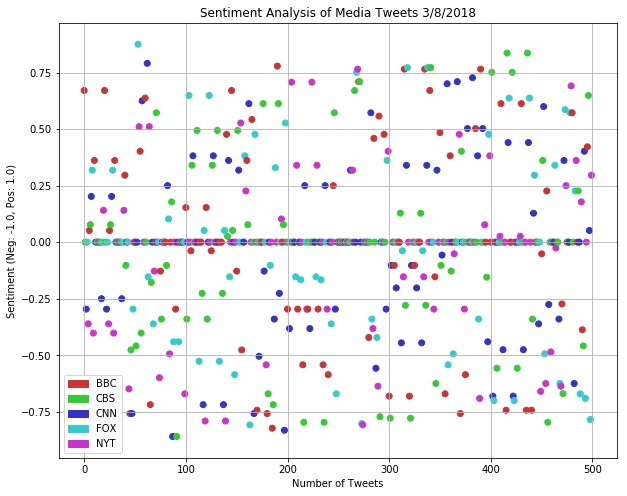

In [6]:
# Plots
now = datetime.datetime.now()

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Sentiment Analysis of Media Tweets {}/{}/{}'.format(now.month, now.day, now.year))
ax1.set_xlabel('Number of Tweets')
ax1.set_ylabel('Sentiment (Neg: -1.0, Pos: 1.0)')
ax1.grid(True)
    
colors = [
    (0.8, 0.2, 0.2),
    (0.2, 0.8, 0.2),
    (0.2, 0.2, 0.8),
    (0.2, 0.8, 0.8),
    (0.8, 0.2, 0.8)
]
    
ax1.scatter(range(len(tweet_df['Sent.Compound'])), tweet_df['Sent.Compound'], color=colors)

bbc = pch.Patch(color=colors[0], label='BBC')
cbs = pch.Patch(color=colors[1], label='CBS')
cnn = pch.Patch(color=colors[2], label='CNN')
fox = pch.Patch(color=colors[3], label='FOX')
nyt = pch.Patch(color=colors[4], label='NYT')
ax1.legend(handles=[bbc, cbs, cnn, fox, nyt])

### Bar Chart 
Each bar represents each outlet's average score over the last five hundred tweets. The goal is to chart whether they were positive, negative, or neutral overall.

In [7]:
bbc_df = tweet_df.loc[tweet_df['Source'] == '@BBCWorld']
cbs_df = tweet_df.loc[tweet_df['Source'] == '@CBSNews']
cnn_df = tweet_df.loc[tweet_df['Source'] == '@CNN']
fox_df = tweet_df.loc[tweet_df['Source'] == '@FoxNews']
nyt_df = tweet_df.loc[tweet_df['Source'] == '@nytimes']

bbc_avg = bbc_df['Sent.Compound'].mean()
cbs_avg = cbs_df['Sent.Compound'].mean()
cnn_avg = cnn_df['Sent.Compound'].mean()
fox_avg = fox_df['Sent.Compound'].mean()
nyt_avg = nyt_df['Sent.Compound'].mean()

<Container object of 5 artists>

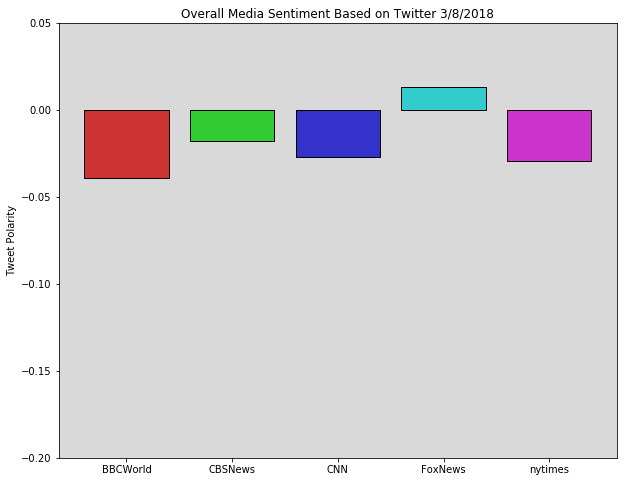

In [8]:
fig, ax2 = plt.subplots(figsize=(10, 8))
plt.title('Overall Media Sentiment Based on Twitter {}/{}/{}'.format(now.month, now.day, now.year))
ax2.set_ylabel('Tweet Polarity')
ax2.set_ylim(-0.20, 0.05)
ax2.set_facecolor((0.85, 0.85, 0.85))
ax2.bar(users, [bbc_avg, cbs_avg, cnn_avg, fox_avg, nyt_avg], color=colors, edgecolor='k')